# Embodied cognition on Wikipedia: a data analysis
In what follows, an analysis of the page edits and views count for the _"Embodied cogtnition"_ article on Wikipedia is done. The data is provided by the WikipediaStatistics at en.wikipedia.org

### Load data

In [325]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})
import seaborn as sns
import calendar
import numpy as np
import datetime
from datetime import datetime

df_views_count_month = pd.read_csv('Data/ec-pageviews-20191201-20220531.csv', delimiter=",", header=0, index_col=False)
df_views_count_all = pd.read_csv('Data/ec-pageviews-20150701-20220531.csv', delimiter=',', header=0, index_col=False)

df_edits_count = pd.read_csv('Data/wiki_ec_edits_count2.csv', delimiter=",", header=0, index_col=False)

df_views_count_all

,Date,Embodied cognition
0,2015-07-01,265
1,2015-07-02,288
2,2015-07-03,211
3,2015-07-04,207
4,2015-07-05,234
...,...,...
2522,2022-05-27,427
2523,2022-05-28,435
2524,2022-05-29,478
2525,2022-05-30,494


In [328]:
# Converting date to a datestamp type
df_views_count_all["Date"] = pd.to_datetime(df_views_count_all["Date"])
df_edits_count["DateTime"] = pd.to_datetime(df_edits_count["DateTime"])
df_views_count_all

,Date,Embodied cognition
0,2015-07-01,265
1,2015-07-02,288
2,2015-07-03,211
3,2015-07-04,207
4,2015-07-05,234
...,...,...
2522,2022-05-27,427
2523,2022-05-28,435
2524,2022-05-29,478
2525,2022-05-30,494


### 1. Data  preprocessing

In [329]:
# Check for missing values
print(df_edits_count.isnull().sum())
#
# Setting DateTime as index from csv files
df_views_count_all = df_views_count_all.set_index("Date")
df_edits_count = df_edits_count.set_index("DateTime")
df_views_count_all

DateTime          0
Edits             0
IPs               0
IPs               0
Minor edits       0
Minor edits       0
Size            208
dtype: int64


,Embodied cognition
Date,
2015-07-01,265
2015-07-02,288
2015-07-03,211
2015-07-04,207
2015-07-05,234
...,...
2022-05-27,427
2022-05-28,435
2022-05-29,478


### 1. Edits count

In [330]:
df_edits_count = df_edits_count.fillna(0).astype(int)
df_edits_count

,Edits,IPs,IPs,Minor edits,Minor edits,Size
DateTime,,,,,,
2002-04-01,7,6,85,2,28,492
2002-05-01,0,0,0,0,0,0
2002-06-01,0,0,0,0,0,0
2002-07-01,0,0,0,0,0,0
2002-08-01,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-11-01,19,2,10,2,10,0
2021-12-01,53,1,1,17,32,0
2022-01-01,87,0,0,31,35,166875


In [332]:
# Select the edits per year and month
edits_year = df_edits_count.index.year
print(edits_year)

Int64Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2004,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022],
           dtype='int64', name='DateTime', length=228)


In [333]:
# Sum per year
edit_sum_year = df_edits_count["Edits"].groupby(edits_year).sum()
minor_sum_year = df_edits_count["Minor edits"].groupby(edits_year).sum()
editors_sum_year = df_edits_count["IPs"].groupby(edits_year).sum()
size_year = df_edits_count["Size"].groupby(edits_year).sum()

edit_sum_year  = pd.DataFrame(edit_sum_year)
edit_sum_year["Minor edits"] = pd.DataFrame(minor_sum_year)
edit_sum_year["Editors"] = pd.DataFrame(editors_sum_year)
edit_sum_year['Size'] = pd.DataFrame(size_year)
edit_sum_year2 = edit_sum_year.reset_index()
edit_sum_year2

,DateTime,Edits,Minor edits,Editors,Size
0,2002,8,2,6,492
1,2004,32,16,11,5566
2,2005,16,3,9,5782
3,2006,17,6,5,6699
4,2007,16,7,4,6896
5,2008,42,27,2,16678
6,2009,38,17,9,14475
7,2010,30,12,7,21183
8,2011,203,28,33,54061
9,2012,55,18,1,55732


In [337]:
def plot_edits_size(df, save=True):
    fig, ax1 = plt.subplots(figsize=(20, 16))
    ax2 = ax1.twinx()
    width = 0.82

    edit_sum_year2[['Edits','Minor edits','Editors']].plot(kind='bar',width=width, ax=ax1)
    edit_sum_year2[['Size']].plot(secondary_y = True, ax=ax2, color='red', marker='o')
    ax1.set_ylabel('Edits count')
    ax1.set_xlabel('Year', labelpad=10)
    ax1.set_title("Article's edits count and size per year")

    plt.gcf().autofmt_xdate(rotation=55)
    ax1 = plt.gca()
    # make secondary y-axis (right) start from same zero value as left y-axis
    ax1.set_ylim(bottom=0)
    ax1.set_ylabel('Size in characters')
    ax1.set_xticklabels(edit_sum_year2.DateTime.tolist())

    # Save image high resolution image
    # Uncomment to save image
    # format can include # e.g .png, .svg, etc.
    if save:
        plt.savefig("Images/edits_count_and_size.eps", format='eps', dpi=1200)
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


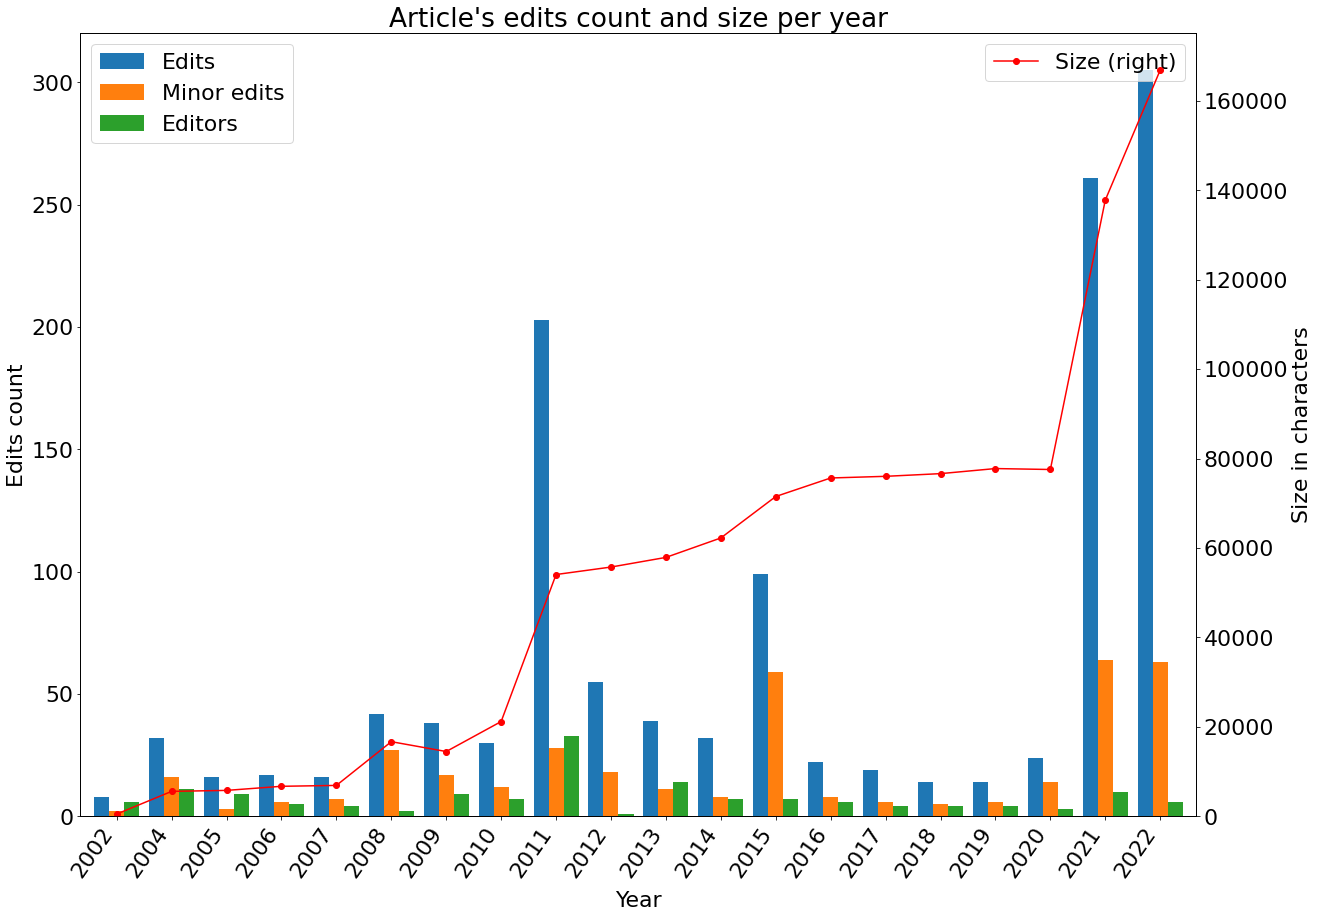

In [338]:
plot_edits_size(edit_sum_year2, save=True)

### 2. Views count

In [312]:
# days df
df_views_count_all
# months df
df_views_count_month

,Date,Embodied cognition
0,2019-12,11503
1,2020-01,11316
2,2020-02,10181
3,2020-03,10395
4,2020-04,11524
5,2020-05,10698
6,2020-06,8764
7,2020-07,9044
8,2020-08,9159
9,2020-09,9794


In [262]:
# select the 15 months period previous and during project
views_before_project = df_views_count_all['2019-12-01':'2021-02-01']
views_during_project = df_views_count_all['2021-03-01':'2022-05-01']

In [310]:
views_before_project['Time period'] = 'Before'
views_during_project['Time period'] = 'During'
# join both dataframes in one for visualizations
joined_df = views_before_project.append(views_during_project)

,Embodied cognition
count,429.000000
mean,340.657343
std,76.021711
min,193.000000
25%,289.000000
50%,334.000000
75%,374.000000
max,815.000000


On the top, we have the daily page views distribution for both: a 15 months period before beginning of the project ("Before") and a 15 months period after beginning of the project ("During").
On the bottom, we have the estimated central tendency for daily page views (indicated by the position of scatter plot points) and some indication of the uncertainty around that estimate (indicated  by the vertical error bars).

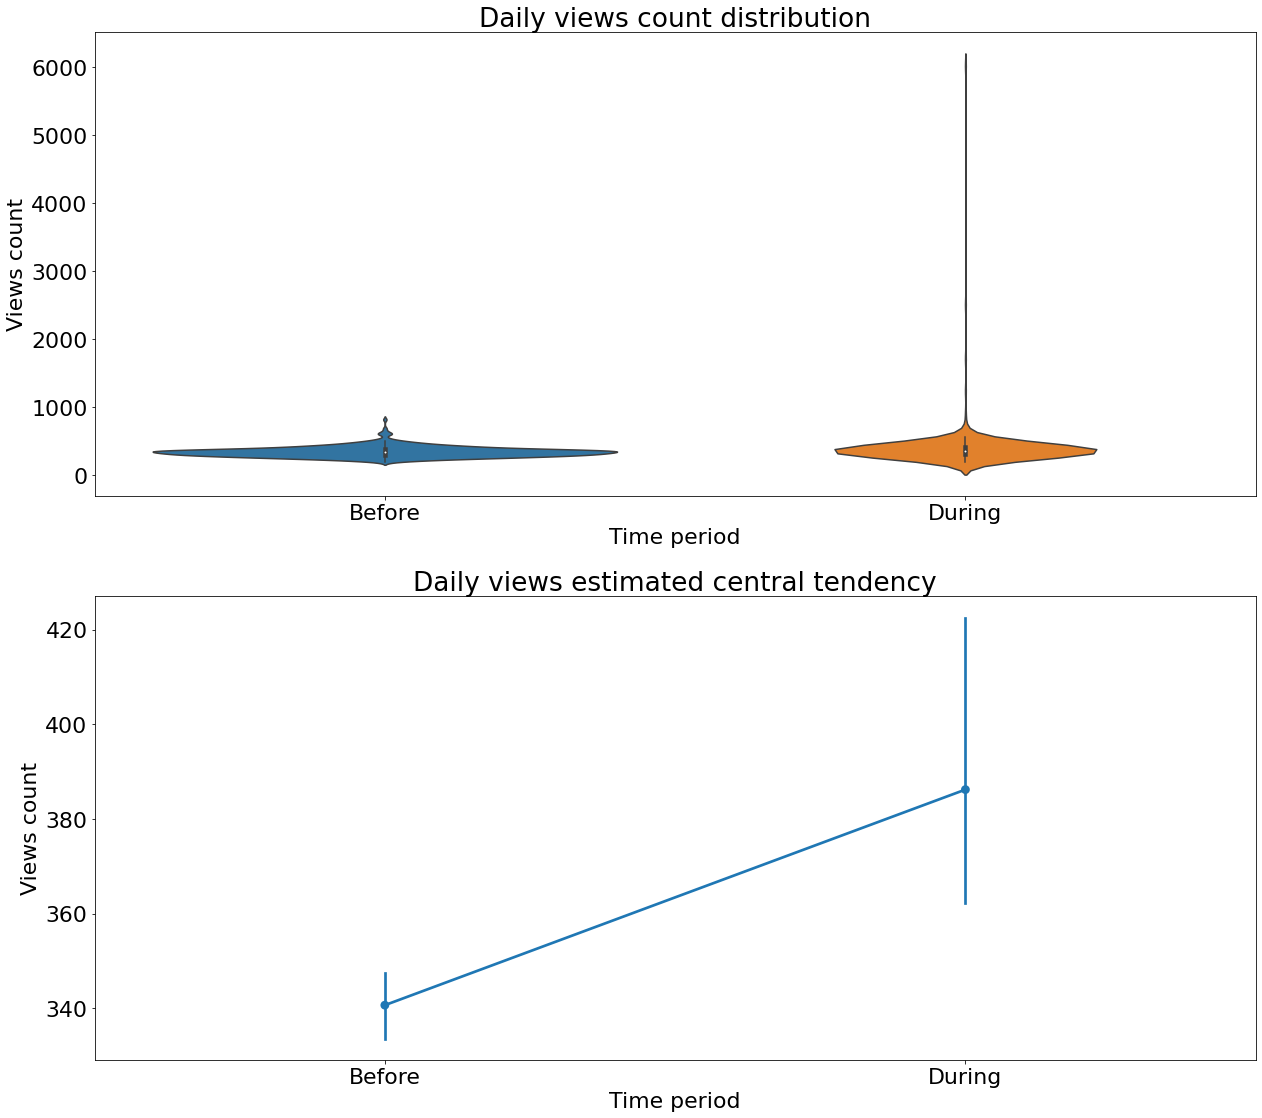

In [309]:
fig, ax = plt.subplots(2,1, figsize=(18,16))
sns.violinplot(x='Time period', y='Embodied cognition',data=joined_df, ax=ax[0])
ax[0].set_title("Daily views count distribution")
ax[0].set_ylabel('Views count')
sns.pointplot(x='Time period', y='Embodied cognition',data=joined_df, ax=ax[1])
ax[1].set_title("Daily views estimated central tendency")
ax[1].set_ylabel("Views count")
fig.tight_layout()
plt.savefig("Images/daily_views_avg.eps", format='eps', dpi=1200)
plt.show()

The total monthly page views over a 30 months period. The red dashed vertical line indicates the beginning of the project at March 2021.

In [296]:
labels = ['Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020','Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021', 'Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


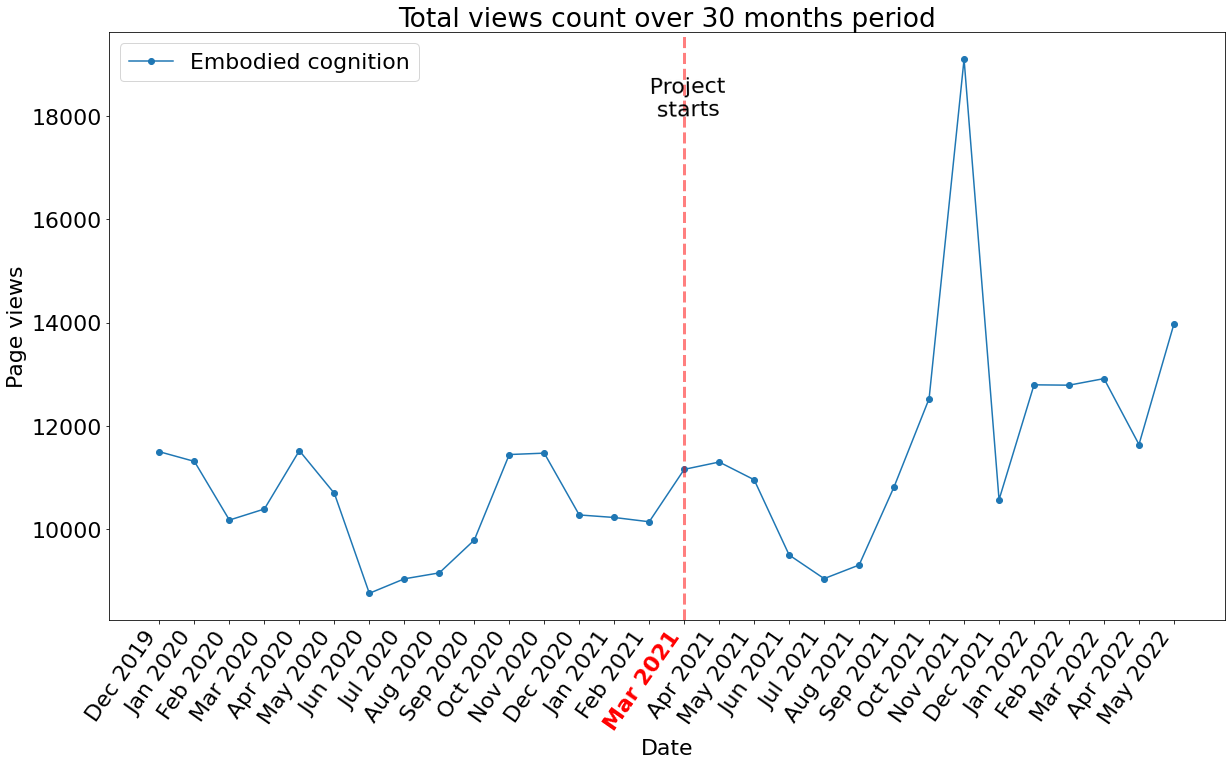

In [306]:
fig, ax = plt.subplots(figsize=(20,12))
df_views_count_month[['Embodied cognition']].plot(ax=ax, marker='o')
plt.xticks(range(0,len(df_views_count_month[['Embodied cognition']].index)),df_views_count_month.Date)
plt.gcf().autofmt_xdate(rotation=55)
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Total views count over 30 months period")
ax.set_xticklabels(labels)
ax.get_xticklabels()[15].set(weight='heavy', color='red')
ax.axvline([15], alpha=0.5, color='red', linestyle='--', linewidth=3)
ax.text(14,18000,'Project \n starts',rotation=1)
plt.savefig("Images/monthly_views_30_months.eps", format='eps', dpi=1200)
plt.show()